In [3]:
import numpy as np
import pandas as pd
import os
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import cross_validate, learning_curve, train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from tensorflow.keras import models,layers, Sequential

/home/ludwig/code/Matuschkalulu/traffic_signs/notebooks/../raw_data/Train/0


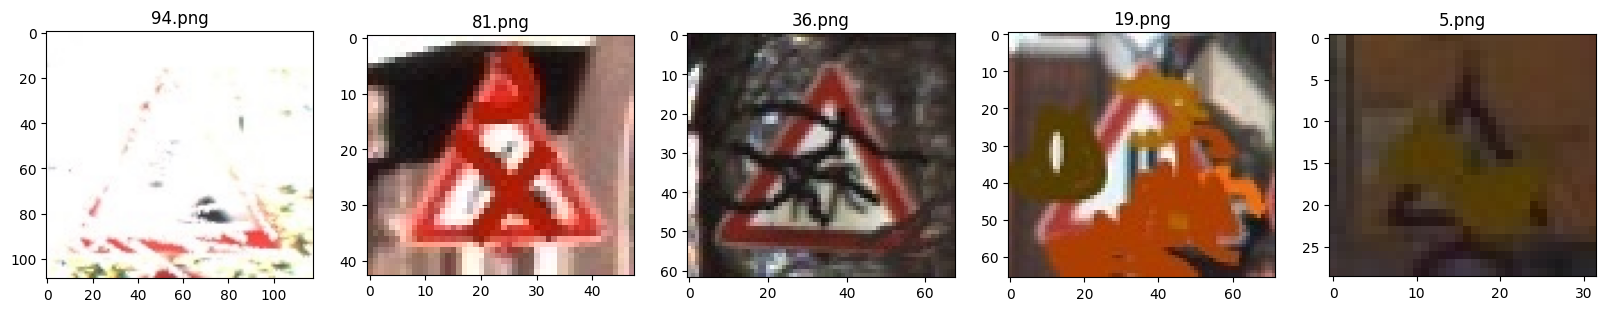

In [12]:
plt.figure(figsize=(20,20))
img_folder=os.path.join(os.getcwd(),'..','raw_data','Train','0')
print(img_folder)
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [2]:
def model_aug_init():
    augmentation = Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomRotation(0.1)
    ])
    augment_model = Sequential([
        layers.Input(shape = input_shape),
        augmentation,
        model = Sequential()
        ### First Convolution & MaxPooling
        model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same', input_shape=(100, 100, 3)))
        model.add(layers.MaxPool2D(pool_size=(2,2)))
        ### Second Convolution & MaxPooling
        model.add(layers.Conv2D(16, (3,3), activation='relu'))
        model.add(layers.MaxPool2D(pool_size=(2,2)))
        ### Third Convolution & MaxPooling
        model.add(layers.Conv2D(32, (3,3), activation='relu'))
        model.add(layers.MaxPool2D(pool_size=(2,2)))
        ### Fourth Convolution & MaxPooling
        model.add(layers.Conv2D(32, (3,3), activation='relu'))
        model.add(layers.MaxPool2D(pool_size=(2,2)))
        ### Fifth Convolution & MaxPooling
        model.add(layers.Conv2D(64, (3,3), activation='relu'))
        model.add(layers.MaxPool2D(pool_size=(2,2)))
        ### Flattening
        model.add(layers.Flatten())

        ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
        model.add(layers.Dense(10, activation='relu'))

        ### Last layer - Classification Layer
        model.add(layers.Dense(1, activation='sigmoid'))

        ### Model compilation
        model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
    ])
    return augment_model

usage: ipykernel_launcher.py [-h] -i IMAGE -c CONFIG -w WEIGHTS -cl CLASSES
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -c/--config, -w/--weights, -cl/--classes


SystemExit: 2

In [3]:
image = cv2.imread(args.image)


NameError: name 'args' is not defined